<a href="https://colab.research.google.com/github/linlih/ML_By_NTU_Hung-yi-Lee/blob/master/Regression_by_gradient_descent_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x_data = [ 338., 333., 328., 207., 226., 25., 179., 60., 208.,  606. ]
y_data = [ 640., 633., 619., 393., 428., 27., 193., 66., 226., 1591. ]
# y_data = b + w * x_data

In [0]:
x = np.arange(-200, -100, 1) # bias
y = np.arange(-5, 5, 0.1) # weight
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range((len(y))):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
           Z[j][i] = Z[j][i] +(y_data[n] - b - w*x_data[n])**2
        Z[j][i] = Z[j][i]/len(x_data)

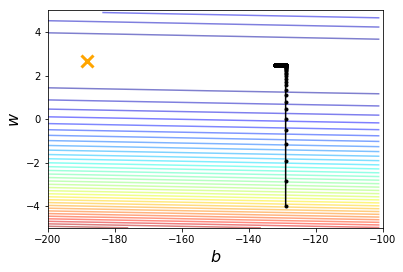

In [0]:
b = -129 # intialize b
w = -4 # intialize w
lr = 0.0000001 # learning rate
iteration = 100000

# Store intial values for plotting
b_history = [b]
w_history = [w]

# Iteration
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    
    # Update parameters
    b = b - lr * b_grad
    w = w - lr * w_grad
    
    # Store the parameters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contour(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

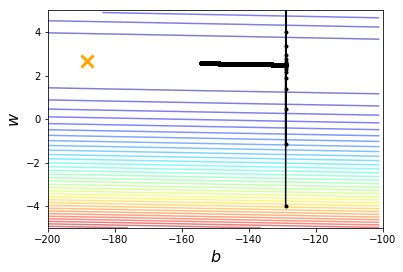

In [0]:
#### change the lr to 0.000001

b = -129 # intialize b
w = -4 # intialize w
lr = 0.000001 # learning rate
iteration = 100000

# Store intial values for plotting
b_history = [b]
w_history = [w]

# Iteration
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    
    # Update parameters
    b = b - lr * b_grad
    w = w - lr * w_grad
    
    # Store the parameters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contour(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

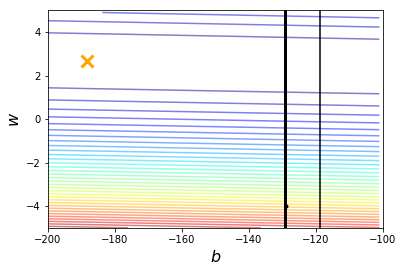

In [0]:
#### change the lr to 0.00001

b = -129 # intialize b
w = -4 # intialize w
lr = 0.00001 # learning rate
iteration = 100000

# Store intial values for plotting
b_history = [b]
w_history = [w]

# Iteration
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    
    # Update parameters
    b = b - lr * b_grad
    w = w - lr * w_grad
    
    # Store the parameters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contour(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

## 问题

一开始我们设置学习率为0.0000001，经过10万次迭代，我们发现离最优解还挺远，说明学习率太小，然后我们将学习率调整为0.000001，扩大了10倍，但是这个时候我们发现，学习率有发生了震荡，但是比之前的结果好了一点，更加接近我们的最优解。然后我们又将学习率增大了十倍，发现，糟糕了，最终结果已经超出了整个图纸，完全震荡了，找不到最优解了。


## 解决方案

客制化b、w不同的学习率

这种方法称之为AdaGrad

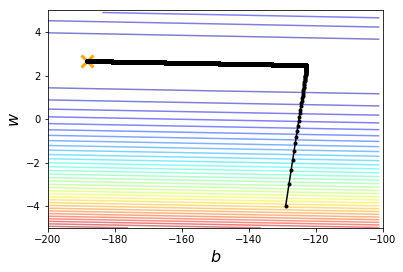

In [0]:
#### using adagrad to solve this problem

b = -129 # intialize b
w = -4 # intialize w
lr = 1 # learning rate
iteration = 100000

b_lr = 0.0
w_lr = 0.0

# Store intial values for plotting
b_history = [b]
w_history = [w]

# Iteration
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    
    b_lr = b_lr + b_grad**2
    w_lr = w_lr + w_grad**2
    
    # Update parameters
    b = b - lr/np.sqrt(b_lr) * b_grad
    w = w - lr/np.sqrt(w_lr) * w_grad
    
    # Store the parameters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contour(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()